# Data loading and cleaning

In [2]:
!kaggle datasets download -d juhi1994/superstore --unzip

Dataset URL: https://www.kaggle.com/datasets/juhi1994/superstore
License(s): unknown




  0%|          | 0.00/0.98M [00:00<?, ?B/s]
100%|██████████| 0.98M/0.98M [00:00<00:00, 1.10MB/s]
100%|██████████| 0.98M/0.98M [00:00<00:00, 1.10MB/s]


In [8]:
import pandas as pd

df = pd.read_excel('US Superstore data.xls')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Sales trends over the years

In [13]:
import plotly.express as px


df['Year'] = df['Order Date'].dt.year
sales_trend = df.groupby('Year')['Sales'].sum().reset_index()


fig_sales_trend = px.line(sales_trend, x='Year', y='Sales', title='Sales Trend Over the Years',
                          labels={'Sales': 'Total Sales', 'Year': 'Year'}, markers=True)

fig_sales_trend.show()


## Sales distribution by states

In [19]:
import plotly.graph_objects as go

# Dictionary of state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Adding the state abbreviation to the dataset
df['State Abbrev'] = df['State'].map(state_abbrev)

# Aggregating sales by state abbreviation
state_sales_abbrev = df.groupby('State Abbrev')['Sales'].sum().reset_index()

# Creating the map visualization using Plotly's choropleth for better state mapping
fig = go.Figure(data=go.Choropleth(
    locations=state_sales_abbrev['State Abbrev'],  # State abbreviations
    z=state_sales_abbrev['Sales'],  # Sales values
    locationmode='USA-states',  # Scope to USA states
    colorscale='Blues',
    colorbar_title="Sales"
))

fig.update_layout(
    title_text='Sales Distribution by State',
    geo_scope='usa',  # Limit map scope to USA
)

# Showing the map plot
fig.show()


In [39]:
state_sales_abbrev = df.groupby('State Abbrev')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
state_sales_abbrev


,State Abbrev,Sales
3,CA,457687.6315
32,NY,310876.2710
41,TX,170188.0458
45,WA,138641.2700
36,PA,116511.9140
8,FL,89473.7080
12,IL,80166.1010
33,OH,78258.1360
20,MI,76269.6140
43,VA,70636.7200


## The bar chart showing top 10 products by sales

In [27]:
product_sales_t10 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
product_sales_t10

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


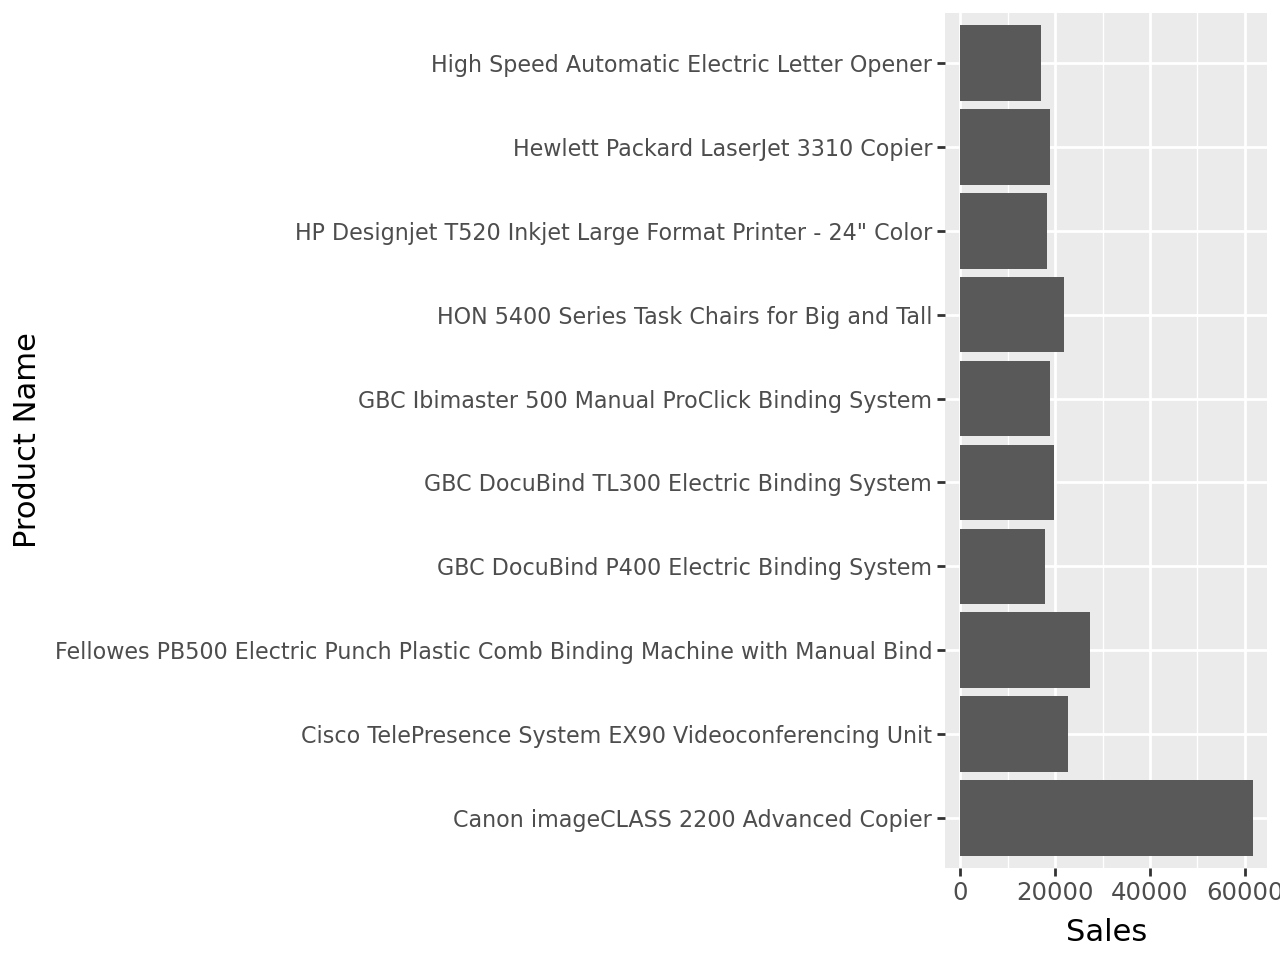

In [35]:
from plotnine import ggplot, aes, geom_bar, coord_flip, theme_minimal, theme, element_text


(
    ggplot(product_sales_t10, aes(x='Product Name', y='Sales'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme(axis_text_y=element_text(size=8))  
)


# Profit vs. Discount

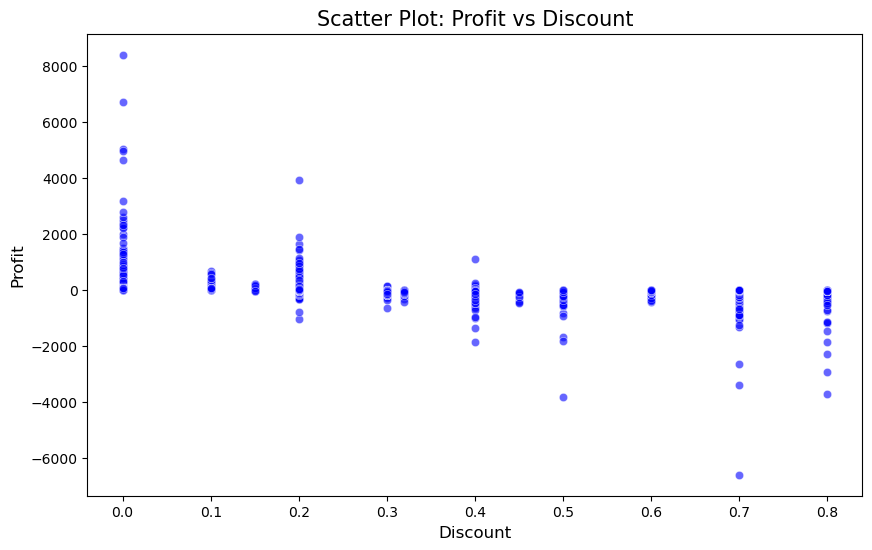

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6, color='blue')


plt.title('Scatter Plot: Profit vs Discount', fontsize=15)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)


plt.show()

# Conclusions

- Sales volume grew steadily after a slight decline in 2015
- California, New York and Texas accounted for the most sales
- "Canon imageCLASS 2200 Advanced Copier" was the top seller, more than 2x the sales of the second best seller
- Low-margin items tend to receive high discounts